In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path=r"/Users/lokeshwari/Dataset/Heart_Attack/heart.csv"
df= pd.read_csv(path)

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

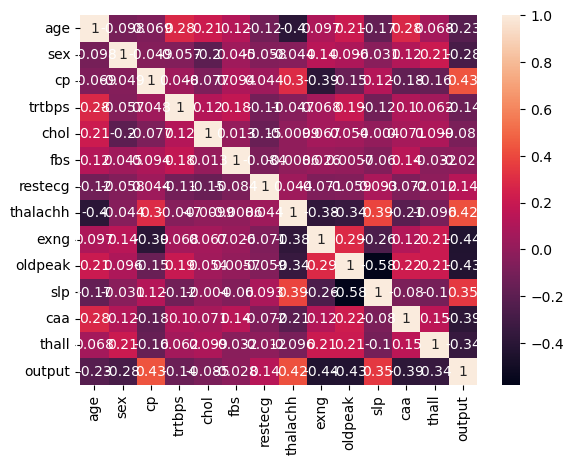

In [14]:
fig=sns.heatmap(df.corr(),annot=True); #colour mapping, pivot element
#an array of the same shape as data which is used to annotate(comments) the heatmap. 

In [15]:
abs(df.corr()['output']).sort_values(ascending=False) 
#corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64

In [16]:
df.sex.unique() 
#unique() function finds the unique elements of an array and returns these unique elements as a sorted array

array([1, 0])

In [17]:
df.sex=df['sex'].replace([1,0],['M','F'])

In [18]:
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
107,45,F,0,138,236,0,0,152,1,0.2,1,0,2,1
200,44,M,0,110,197,0,0,177,0,0.0,2,1,2,0
104,50,M,2,129,196,0,1,163,0,0.0,2,0,2,1
169,53,M,0,140,203,1,0,155,1,3.1,0,0,3,0
61,54,M,1,108,309,0,1,156,0,0.0,2,0,3,1


In [19]:
df.thall.unique()

array([1, 2, 3, 0])

In [20]:
df.thall=df.thall.astype('category')

In [21]:
df['t']=220-df.age

In [22]:
df['riskthalachh']=((220-df.age)-df.thalachh)

In [24]:
df.sample()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,t,riskthalachh
108,50,F,1,120,244,0,1,162,0,1.1,2,0,2,1,170,8


In [25]:
df.cp.unique()

array([3, 2, 1, 0])

In [20]:
df.cp=df.cp.astype("category")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           303 non-null    int64   
 1   sex           303 non-null    object  
 2   cp            303 non-null    int64   
 3   trtbps        303 non-null    int64   
 4   chol          303 non-null    int64   
 5   fbs           303 non-null    int64   
 6   restecg       303 non-null    int64   
 7   thalachh      303 non-null    int64   
 8   exng          303 non-null    int64   
 9   oldpeak       303 non-null    float64 
 10  slp           303 non-null    int64   
 11  caa           303 non-null    int64   
 12  thall         303 non-null    category
 13  output        303 non-null    int64   
 14  t             303 non-null    int64   
 15  riskthalachh  303 non-null    int64   
dtypes: category(1), float64(1), int64(13), object(1)
memory usage: 36.1+ KB


In [27]:
df.oldpeak.value_counts(ascending=False) 
#The value_counts() method returns a Series containing the counts of unique values

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [28]:
df.isnull().sum().any()

False

In [29]:
x=df.drop(['output','chol','fbs','t','trtbps','thalachh'], axis=1)

In [30]:
x.sample()

,age,sex,cp,restecg,exng,oldpeak,slp,caa,thall,riskthalachh
61,54,M,1,1,0,0.0,2,0,3,10


In [31]:
x=pd.get_dummies(x,drop_first=True)

In [32]:
y=df.output

In [33]:
y.sample()

143    1
Name: output, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split #avoid overfit and controll underfitting

In [1]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = )

NameError: name 'train_test_split' is not defined

In [31]:
print('x_train Shape: {}'.format(x_train.shape))
print('x_test Shape:  {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape:  {}'.format(y_test.shape))

x_train Shape: (242, 14)
x_test Shape:  (61, 14)
y_train Shape: (242,)
y_test Shape:  (61,)


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [35]:
def classalgo_test(x_train,x_test,y_train,y_test): #classification
      
    g=GaussianNB()
    kc=KNeighborsClassifier()
    lr=LogisticRegression()
    rfc=RandomForestClassifier()
    xgb=XGBClassifier()
    
    algos = [g,kc,lr,rfc,xgb]
    algo_names = ['GaussianNB','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','XGBClassifier']
    accsc=[]
    precsc=[]
    fsc=[]
    
    result = pd.DataFrame(columns = ['Accuracy Score','Precision Score'],index = algo_names)
    
    for algo in algos:
    
        algo.fit(x_train,y_train)
        pred=algo.predict(x_test)
        accsc.append(accuracy_score(pred,y_test))
        precsc.append(precision_score(pred,y_test))
        fsc.append(f1_score(pred, y_test, average='micro'))
    
    result['Accuracy Score'] = accsc
    result['Precision Score'] = precsc
    result['F1 Score']= fsc
        
    return result.sort_values('Accuracy Score', ascending=False)
    
    

In [36]:
classalgo_test(x_train,x_test,y_train,y_test)

/Users/lokeshwari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lokeshwari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

,Accuracy Score,Precision Score,F1 Score
LogisticRegression,0.901639,0.90625,0.901639
GaussianNB,0.868852,0.84375,0.868852
RandomForestClassifier,0.819672,0.78125,0.819672
XGBClassifier,0.803279,0.78125,0.803279
KNeighborsClassifier,0.672131,0.65625,0.672131


In [ ]:
Result:
    The suitable algorithm for this data set is LOSISTIC REGRESSION